# `Logistic Regression ---------------------------------------- `

In [169]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [170]:
data  = pd.read_csv("Social_Network_Ads.csv")

In [171]:
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [172]:
data.drop(["User ID"],axis=1,inplace=True) ## unwanted column

In [173]:
data

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [174]:
data.dtypes

Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

### Converting to category

In [175]:
conversion_col_cat = ["Gender","Purchased"]
for col in conversion_col_cat:
    data[col] = data[col].astype("category")

In [176]:
data.dtypes

Gender             category
Age                   int64
EstimatedSalary       int64
Purchased          category
dtype: object

In [177]:
target = "Purchased"
cont_columns = data.select_dtypes("int64")
cat_columns = [i for i in data.select_dtypes("category") if i!= target]

## `Bivariant analysis`

### Cat vs Num : T-test

Age => t-test result => Ttest_indResult(statistic=-15.86638147378889, pvalue=2.800233943272422e-44)

EstimatedSalary => t-test result => Ttest_indResult(statistic=-7.7493599219079, pvalue=7.772785450066969e-14)



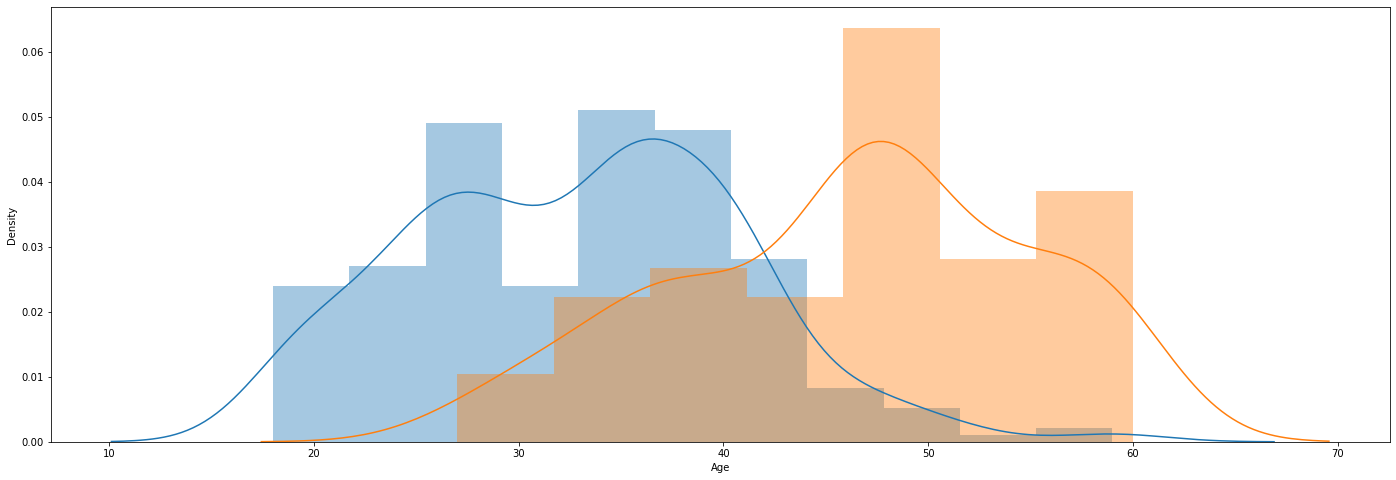

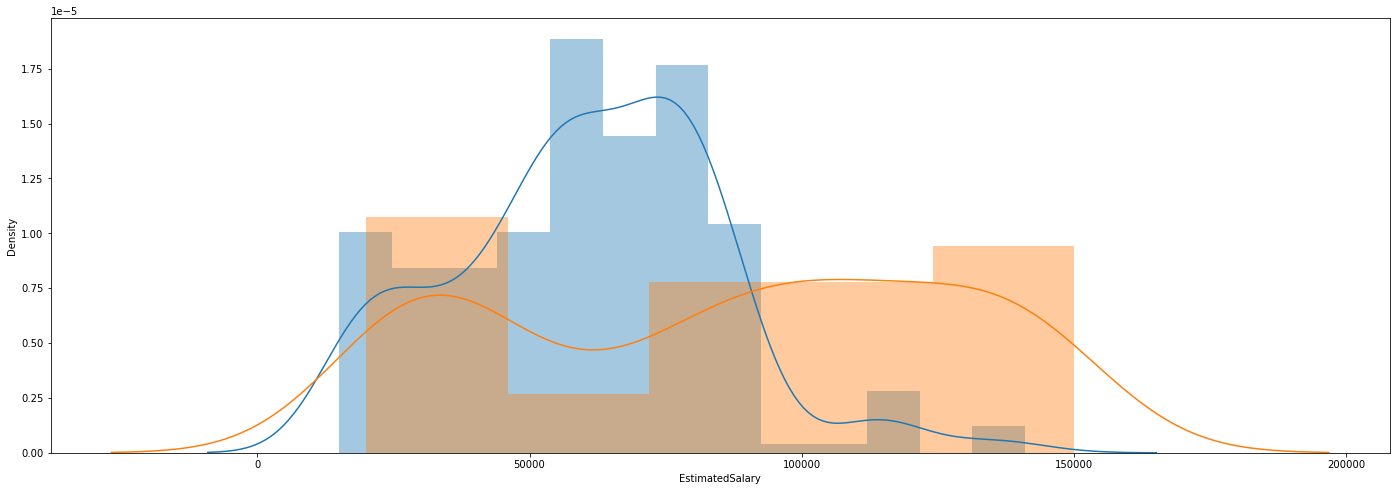

In [178]:
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt

def t_test_plot(col,grp1,grp2):
    plt.figure(figsize=(24,8))
    sns.distplot(grp1)
    sns.distplot(grp2)
    t_test_resutl = ttest_ind(grp1,grp2)
    print(f"{col} => t-test result => {t_test_resutl}\n")

    
for col in cont_columns:
    grp1 = data.loc[data[target]==0,col]
    grp2 = data.loc[data[target]==1,col]
    t_test_plot(col,grp1,grp2)

### Cat vs Cat - chi square test

In [179]:
from scipy.stats import chi2_contingency

two_freq = pd.crosstab(data["Purchased"],data["Gender"])
chi2_contingency(two_freq)

(0.5550869364098915,
 0.45624659183130645,
 1,
 array([[131.07, 125.93],
        [ 72.93,  70.07]]))

In [180]:
data.drop(["Gender"],axis=1,inplace=True)

In [181]:
data

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


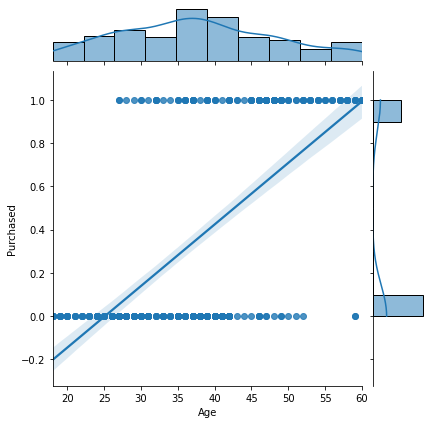

In [182]:
sns.jointplot(data["Age"],data["Purchased"].astype(int),kind='reg')

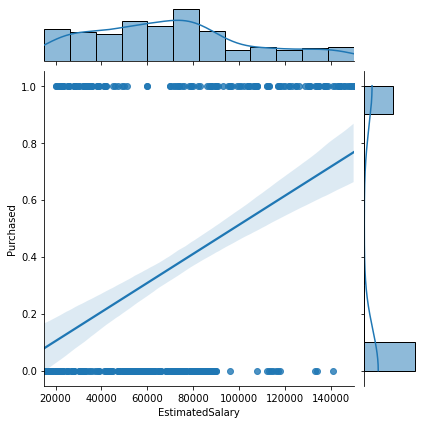

In [183]:
sns.jointplot(data["EstimatedSalary"],data["Purchased"].astype(int),kind='reg')

In [184]:
import plotly.express as px
px.scatter(y=data["EstimatedSalary"],x=data["Age"],color=data["Purchased"])

### `Modelling ----------------------------------`

In [185]:
X = data[["EstimatedSalary","Age"]]
y = data["Purchased"]

In [186]:
X

,EstimatedSalary,Age
0,19000,19
1,20000,35
2,43000,26
3,57000,27
4,76000,19
...,...,...
395,41000,46
396,23000,51
397,20000,50
398,33000,36


In [187]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: category
Categories (2, int64): [0, 1]

In [188]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [189]:
X_train

,EstimatedSalary,Age
3,57000,27
18,28000,46
202,134000,39
250,39000,44
274,26000,57
...,...,...
71,27000,24
106,35000,26
270,133000,43
348,77000,39


In [190]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [191]:
y_pred = model.predict(X_test)

In [192]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [193]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.65

In [194]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[52,  0],
       [28,  0]], dtype=int64)

### `Needs to Standardize to improve accuracy`

In [195]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [196]:
X_train

array([[-0.38634438, -1.06675246],
       [-1.22993871,  0.79753468],
       [ 1.853544  ,  0.11069205],
       [-0.90995465,  0.60129393],
       [-1.28811763,  1.87685881],
       [ 1.44629156, -0.57615058],
       [-0.53179168,  0.3069328 ],
       [ 0.10817643,  0.99377543],
       [ 0.45724994, -1.16487283],
       [ 0.31180264, -1.55735433],
       [ 0.45724994,  1.0918958 ],
       [-0.47361276, -0.18366908],
       [-0.32816546,  0.20881242],
       [ 0.28271318,  0.3069328 ],
       [-1.57901222, -1.16487283],
       [ 0.25362372,  0.11069205],
       [ 1.73718616,  2.07309956],
       [-0.18271817,  0.40505317],
       [ 2.11534913,  1.4843773 ],
       [ 1.21357589, -0.37990983],
       [ 1.50447048,  1.87685881],
       [ 0.02090805,  0.11069205],
       [-1.31720709,  0.89565505],
       [-1.49174384, -1.36111358],
       [-0.5899706 , -0.18366908],
       [ 2.31897535, -0.57615058],
       [-1.20084925,  0.99377543],
       [ 1.06812859, -0.77239133],
       [-1.05540195,

In [197]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [198]:
y_pred = model.predict(X_test)

In [199]:
y_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

In [200]:
y_test

209    0
280    1
33     0
210    1
93     0
      ..
246    0
227    1
369    1
176    0
289    1
Name: Purchased, Length: 80, dtype: category
Categories (2, int64): [0, 1]

In [201]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8625

In [202]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[50,  2],
       [ 9, 19]], dtype=int64)

## `End ---------------------------------`